In [1]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import numpy as np
import time
from matplotlib import pyplot as plt
import glob
from PIL import Image
import random
import string

%matplotlib inline

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

PROCESSING_TITLE = "Multiprocessing"
THREADING_TITLE = "Multithreading"

In [3]:
def multithreading(func, args, workers):
    begin_time = time.time()
    with ThreadPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for _ in range(len(args)) ])
    return list(res)

def multiprocessing(func, args, workers):
    begin_time = time.time()
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for _ in range(len(args))])
    return list(res)

In [4]:
def visualize_runtimes(results, title):
    start, stop = np.array(results).T
    plt.barh(range(len(start)), stop-start, left=start)
    plt.grid(axis='x')
    plt.xlabel('Tasks')
    plt.ylabel('Seconds')
    plt.title(title)
    return stop[-1] - start[0]

## API Calls

In [3]:
from urllib.request import urlopen

def download(url, base):
    start = time.time() - base
    
    try:
        res = urlopen(url)
    except Expection as e:
        print(f"ERROR: {e}")
    
    stop = time.time() - base
    
    return start, stop

In [4]:
N = 16
URL = 'http://scholar.princeton.edu/sites/default/files/oversize_pdf_test_0.pdf'
urls = [URL for i in range(N)]

### Serial

In [35]:
%timeit -n 1 [download(url, 1) for url in urls]

18.9 s ± 493 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Multithreading

19.59378743171692

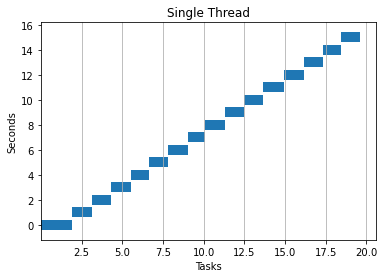

In [36]:
visualize_runtimes(multithreading(download, urls, 1), 'Single Thread')

9.278743028640747

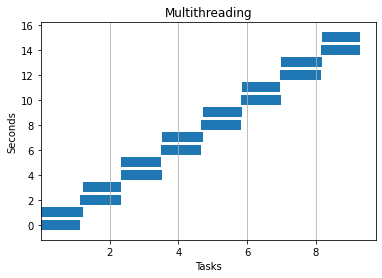

In [37]:
visualize_runtimes(multithreading(download, urls, 2), 'Multithreading')

5.217743635177612

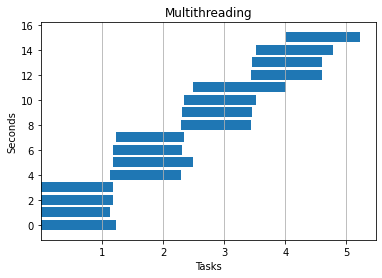

In [38]:
visualize_runtimes(multithreading(download, urls, 4), 'Multithreading')

### Multiprocessing

19.055716514587402

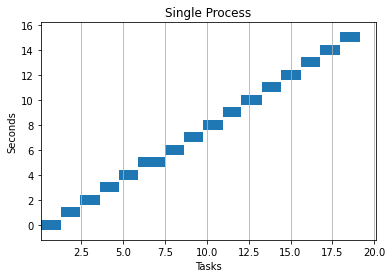

In [39]:
visualize_runtimes(multiprocessing(download, urls, 1), 'Single Process')

10.240890502929688

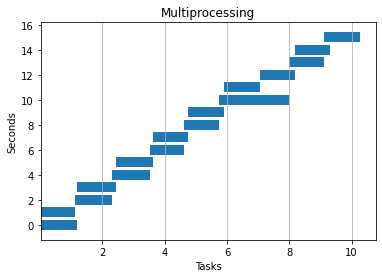

In [40]:
visualize_runtimes(multiprocessing(download, urls, 2), 'Multiprocessing')

5.411108016967773

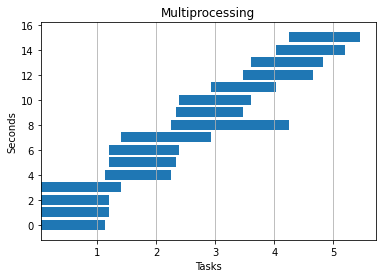

In [42]:
visualize_runtimes(multiprocessing(download, urls, 4), 'Multiprocessing')

## IO Heavy

In [5]:
def io_heavy(text, base):
    start = time.time() - base
    with open("output.txt", 'w') as file:
        file.write(text)
    stop = time.time() - base
    return start, stop

In [6]:
N = 12
TEXT = ''.join([random.choice(string.ascii_lowercase) for _ in range(10**7*5)])
TEXTS = [TEXT for _ in range(N)]

In [7]:
len(TEXTS)

12

### Serial

In [9]:
%timeit -n 1 [io_heavy(TEXT, 1) for _ in range(N)]

1.38 s ± 83.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Multithreading

1.5082006454467773

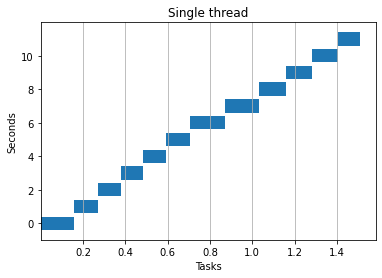

In [10]:
visualize_runtimes(multithreading(io_heavy, TEXTS, 1), "Single thread")

1.138519048690796

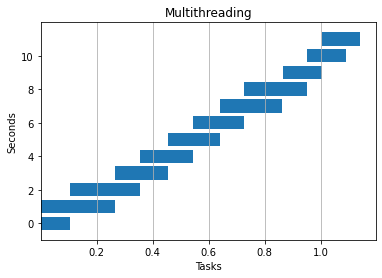

In [11]:
visualize_runtimes(multithreading(io_heavy, TEXTS, 2), THREADING_TITLE)

1.098402976989746

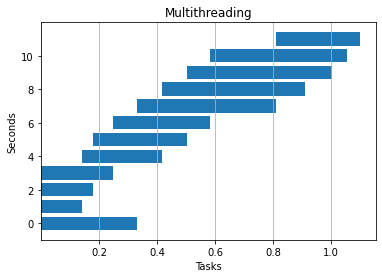

In [19]:
visualize_runtimes(multithreading(io_heavy, TEXTS, 4), THREADING_TITLE)

### Multiprocessing

1.7373590469360352

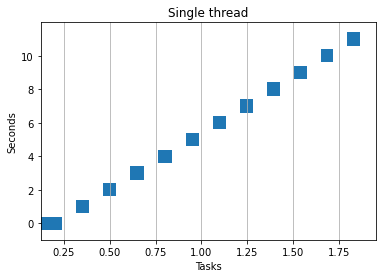

In [16]:
visualize_runtimes(multiprocessing(io_heavy, TEXTS, 1), "Single thread")

1.3008131980895996

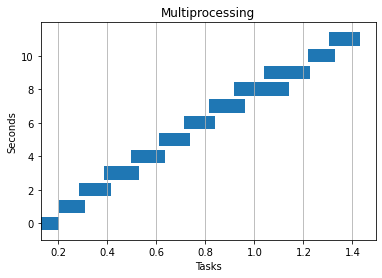

In [17]:
visualize_runtimes(multiprocessing(io_heavy, TEXTS, 2), PROCESSING_TITLE)

1.025106430053711

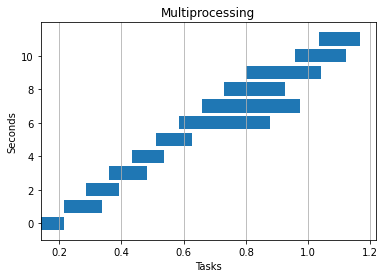

In [18]:
visualize_runtimes(multiprocessing(io_heavy, TEXTS, 4), PROCESSING_TITLE)

## CPU Intensive

In [20]:
def cpu_heavy(n, base):
    start = time.time() - base
    count = 0
    for _ in range(n):
        count += 1
    end = time.time() - base
    return start, end

In [21]:
N = 10**7
ITERS = 10

### Serial

In [22]:
%timeit -n 1 [cpu_heavy(N, 1) for _ in range(ITERS)]

4.54 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Multithreading

5.193698406219482

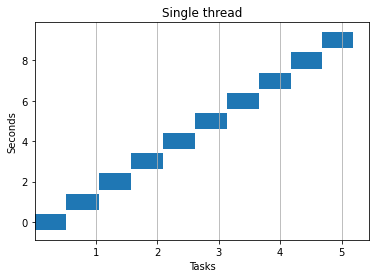

In [23]:
visualize_runtimes(multithreading(cpu_heavy, [N for _ in range(ITERS)], 1), "Single thread")

5.26215934753418

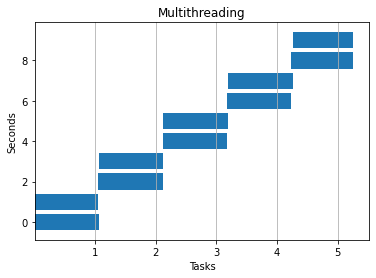

In [24]:
visualize_runtimes(multithreading(cpu_heavy, [N for _ in range(ITERS)], 2), THREADING_TITLE)

4.909423828125

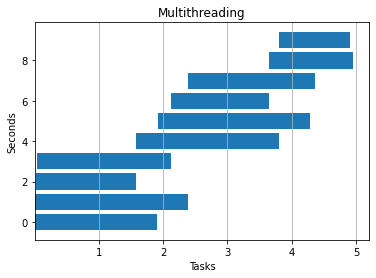

In [25]:
visualize_runtimes(multithreading(cpu_heavy, [N for _ in range(ITERS)], 4), THREADING_TITLE)

### Multiprocessing

5.0506861209869385

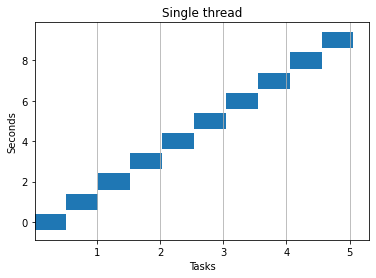

In [29]:
visualize_runtimes(multiprocessing(cpu_heavy, [N for _ in range(ITERS)], 1), "Single thread")

2.304680585861206

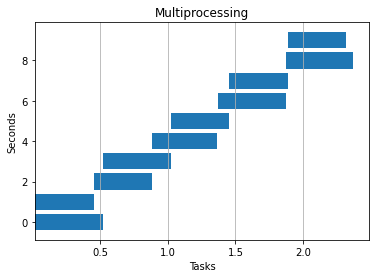

In [30]:
visualize_runtimes(multiprocessing(cpu_heavy, [N for _ in range(ITERS)], 2), PROCESSING_TITLE)

1.3676512241363525

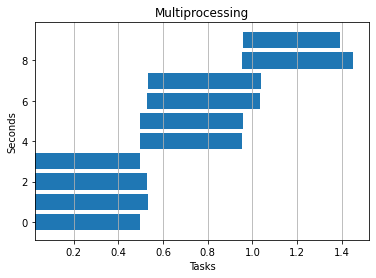

In [31]:
visualize_runtimes(multiprocessing(cpu_heavy, [N for _ in range(ITERS)], 4), PROCESSING_TITLE)